<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.1 Modelos deterministas de primer orden </h3>
<h3 style="text-align: center;"> Ejercicios </h3>

### Ejercicio 1

Una presa perfectamente cúbica con una profundidad de 5.5 $m$ y una base de 100 $m^2$ recibe una entrada constante de líquido de 5  $m^3/hora$ y deja salir constantemente 3  $m^3/hora$. Dado que el nivel de agua inicial de la presa es de 4 $m$: 

**(a)** Indicar si la presa se desbordará y en qué momento. 

**(b)** Tras un análisis más detallado, se comprueba que la presa pierde líquido en función del nivel que alcance, estimándose en 1 $m^3$ por hora y metro de nivel. Indicar en este caso si la presa se desbordará y cuál será el nivel máximo alcanzado por la presa. 

**(c)** Resolver analíticamente el modelo y comprobar que la repuesta a las preguntas anteriores dadas por la simulación coincide con la analítica. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
S = 100
h_max = 5.5
h_0 = 4

f_in = 5
f_out = 3

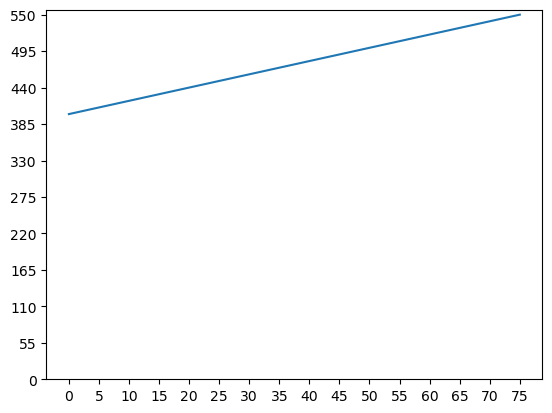

In [3]:
V_max = h_max * S
V = h_0 * S

t = 0

V_hist = [V]

while V < V_max:
    V += f_in - f_out
    V_hist.append(V)
    t += 1

plt.plot(V_hist)
plt.xticks(np.linspace(0, 75, 16))
plt.yticks(np.linspace(0, 550, 11))
plt.show()

## 1.b variable f_out

In [4]:
h_0 = 4
h_max = 5.5
S = 100

f_in = 5

In [5]:
def fsys(x, t, a):
    dxdt = a - x/S
    return dxdt

dt = 0.05
t_0 = 0
t_end = 500

t = np.linspace(t_0, t_end, int((t_end-t_0)/dt+1))

def euler_solve(f, x0, t, args=()):
    n = len(t)
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = x[i] + (t[i+1]-t[i]) * f(x[i], t[i], *args)
    return x


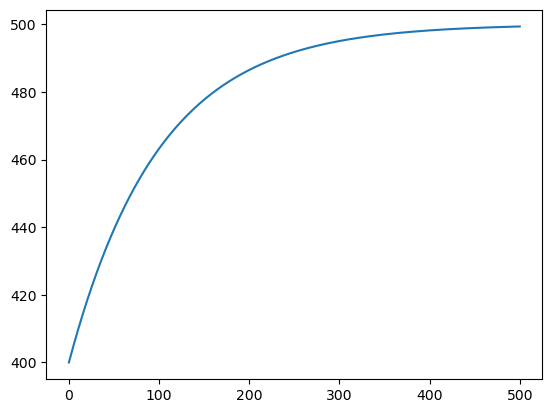

In [6]:
X = euler_solve(fsys, h_0 * S, t, args=[f_in])
plt.plot(t, X)

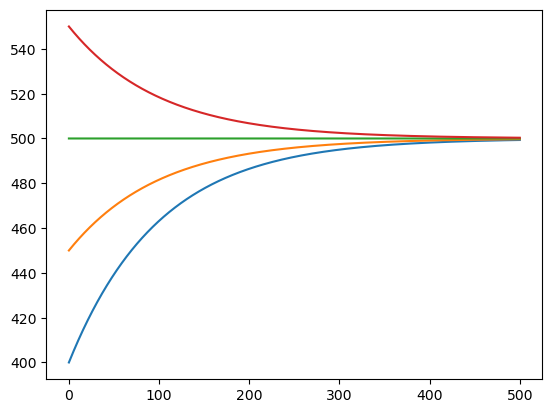

In [7]:
starting_positions = [400, 450, 500, 550]
for x0 in starting_positions:
    X = euler_solve(fsys, x0, t, args=[f_in])
    plt.plot(t, X)

## Ejercicio 2

Una población de bacterias sigue un crecimiento dado por un [modelo logístico](https://mathinsight.org/bacteria_growth_logistic_model). Entonces: 

**(a)**  Modelar la evolución de la población de las bacterias siguiendo un patrón de crecimiento constante, exponencial y logístico. 

**(b)** Calibrar los parámetros del modelo en los tres casos anteriores.

**(c)** Validar el modelo, eligiendo el que mejor se ajuste a los datos.  

**(d)** Estudiar la capacidad de carga o el máximo número de bacterias a largo plazo. 

**(e)** Estudiar el modelo asumiendo diferentes unidades de incremento del tiempo. 

**(f)** Resolver analíticamente el modelo. 


In [8]:
X = np.array([0.022, 0.036, 0.060, 0.101, 0.169, 0.266, 0.360, 0.510, 0.704, 0.827, 0.928])
t = np.array([i*16 for i in range(11)])

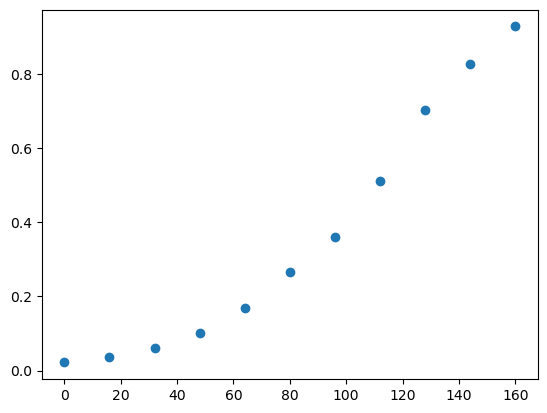

In [9]:
plt.scatter(t, X)

In [10]:
import scipy.optimize as opt

In [11]:
from functools import wraps

def optimize(t, X):
    def wrapper(system):
        @wraps(system)
        def opt(params):
            return system(t, params) - X
        return opt
    return wrapper

In [12]:
@optimize(t, X)
def linear_system(t, p):
    return t * p[0] + p[1]
    

In [13]:
([p_0, p_1], _) = opt.leastsq(linear_system, [3, 0])
p_0, p_1

(np.float64(0.0060426136447342465), np.float64(-0.1213181827556901))

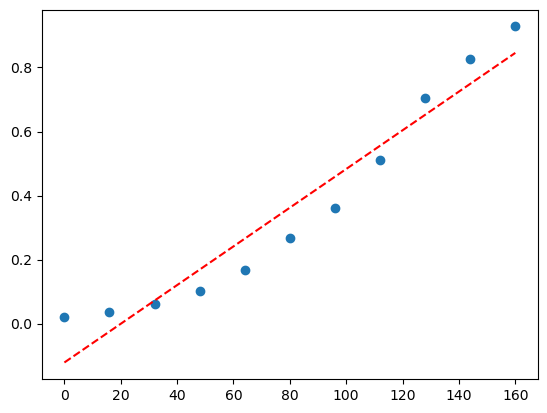

In [14]:
plt.scatter(t, X)
plt.plot(t, t*p_0 + p_1, '--r')

In [97]:
def logistic(r, k):
    def f(x):
        return r * x * (1-x/k)
    return f

def solve_ode(f, x0, t):
    X = np.zeros(len(t))
    X[0] = x0
    for i in range(len(t) - 1):
        dt = (t[i+1]-t[i])
        X[i+1] = X[i] + dt * f(X[i])
    return X

dt = 1/20
t_hat = np.linspace(t[0], t[-1], int((t[-1]-t[0])/dt+1))

def error_func(params):

    X_hat = solve_ode(logistic(*params), X[0], t_hat)
    return X - X_hat[::320]

In [98]:
(r_hat, k_hat), _ = opt.leastsq(error_func, np.array([0.4,1]))
r_hat,k_hat

(np.float64(0.03353609792625078), np.float64(1.164784071029429))

In [91]:
error_func((r, k))

array([ 0.        , -0.00110986, -0.00203492, -0.00118634,  0.00454461,
        0.01044442, -0.01806988, -0.01541007,  0.02346409,  0.00443106,
       -0.00891147])

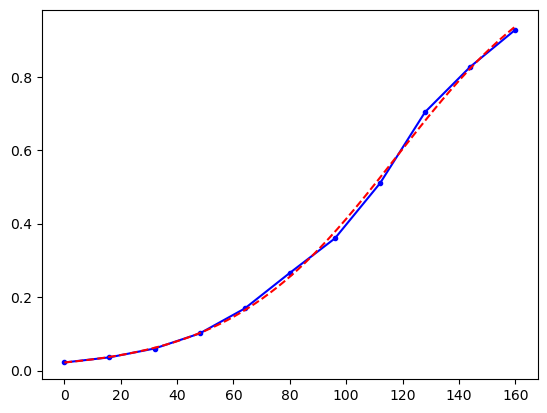

In [95]:
X_hat = solve_ode(logistic(r,k), X[0], t_hat)

plt.plot(t, X, '.-b')
plt.plot(t_hat, X_hat, '--r')

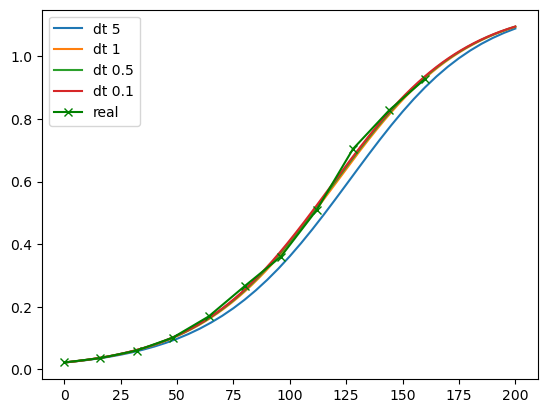

In [107]:
resolutions = (5, 1, 0.5, 0.1)

for res in resolutions:
    t_ex = np.linspace(0, 200, int(200/res+1))
    x_ex = solve_ode(logistic(r_hat, k_hat), X[0], t_ex)
    plt.plot(t_ex, x_ex, label=f'dt {res:}')
plt.plot(t, X, 'x-g', label="real")
plt.legend()
plt.show()